In [1]:
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import sys
import warnings
from pandas import Series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
data= pd.read_csv('C:/Users/Simphiwe/Downloads/Supermart Grocery Sales - Retail Analytics Dataset.csv')
#data= pd.read_excel('../MRP_data.xls')

In [3]:
data.dtypes
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.sort_values(by = 'Order Date')

In [4]:
data.columns
data.nunique()
data.describe()

Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000

In [5]:
# Lower case column names
data.columns = map(str.lower, data.columns)

#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sales', 'discount', 'profit', 'state'],
      dtype='object')

In [6]:
a = data['category'].value_counts()
fig = px.bar(a, x=a.index, y=a.values, height=400)
fig.update_layout( title={
        'text': "Item Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Category",
    yaxis_title="Count")
fig.show()


In [7]:
aa = data.groupby('category')['sales'].sum()
fig = px.bar(aa, x=aa.index, y=aa.values, height=400)
fig.update_layout( title={
        'text': "Item Categories Total Sales",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Category",
    yaxis_title="Sales")
fig.show()

In [8]:
b = data['sub_category'].value_counts()
fig = px.bar(b, x=b.index, y=b.values, height=400)
fig.update_layout( title={
        'text': "Sub Category Items",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Sub category",
    yaxis_title="Count")
fig.show()


In [9]:
bb = data.groupby('sub_category')['sales'].sum()
fig = px.bar(bb, x=bb.index, y=bb.values, height=400)
fig.update_layout( title={
        'text': "Total Sales per Category",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Sub category",
    yaxis_title="Sales")
fig.show()

In [10]:
c = data['region'].value_counts()
fig = px.bar(c, x=c.index, y=c.values, height=400)
fig.update_layout( title={
        'text': "Items Purchased per Region",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Region",
    yaxis_title="Count")
fig.show()
c.index

Index(['West', 'East', 'Central', 'South', 'North'], dtype='object')

In [11]:
cc = data.groupby('region')['sales'].sum()
fig = px.bar(bb, x=cc.index, y=cc.values, height=400)
fig.update_layout( title={
        'text': "Total Sales per Region",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Region",
    yaxis_title="Sales")
fig.show()

In [13]:
df_snacks = data.loc[data['category'] == 'Snacks']
df_Eggs_Meat_Fish = data.loc[data['category'] == 'Eggs, Meat & Fish']
df_Fruits_Veggies   = data.loc[data['category'] == 'Fruits & Veggies']
df_Bakery=data.loc[data['category'] == 'Bakery']
df_Beverages  =data.loc[data['category'] == 'Beverages']
df_Food_Grains=data.loc[data['category'] == 'Food Grains']
df_Oil_Masala  = data.loc[data['category']== 'Oil & Masala']
df_snacks

order_id customer_name category sub_category         city order_date  \
741     OD742         Sudha   Snacks   Chocolates   Dharmapuri 2015-01-04   
9386   OD9387         Akash   Snacks      Noodles      Chennai 2015-01-06   
8634   OD8635       Hussain   Snacks      Cookies   Pudukottai 2015-01-06   
9417   OD9418         Vince   Snacks      Noodles        Karur 2015-01-06   
766     OD767        Arutra   Snacks      Noodles    Nagercoil 2015-01-13   
...       ...           ...      ...          ...          ...        ...   
270     OD271        Esther   Snacks      Noodles        Theni 2018-12-28   
9123   OD9124          Peer   Snacks   Chocolates       Trichy 2018-12-28   
906     OD907         Veena   Snacks   Chocolates  Tirunelveli 2018-12-30   
908     OD909        Mathew   Snacks   Chocolates        Theni 2018-12-30   
907     OD908        Arvind   Snacks      Cookies         Ooty 2018-12-30   

       region  sales  discount  profit       state  
741   Central    759      0.27  174.57  Tamil Nadu  
9386    South   1495      0.19  194.35  Tamil Nadu  
8634    South   1504      0.23  616.64  Tamil Nadu  
9417    South   2157      0.18  258.84  Tamil Nadu  
766     South   1903      0.11  666.05  Tamil Nadu  
...       ...    ...       ...     ...         ...  
270      West    764      0.11  160.44  Tamil Nadu  
9123  Central   1250      0.13  525.00  Tamil Nadu  
906      East   1240      0.34  458.80  Tamil Nadu  
908      East   1167      0.28  455.13  Tamil Nadu  
907      East   1854      0.20  685.98  Tamil Nadu  

[1514 rows x 11 columns]

In [14]:
#Aggregating sales by order date
snacks = df_snacks.groupby('order_date')['sales'].sum().reset_index()
Eggs_Meat_Fish = df_Eggs_Meat_Fish.groupby('order_date')['sales'].sum().reset_index()
Fruits_Veggies = df_Fruits_Veggies.groupby('order_date')['sales'].sum().reset_index()
Bakery = df_Bakery.groupby('order_date')['sales'].sum().reset_index()
Beverages = df_Beverages.groupby('order_date')['sales'].sum().reset_index()
Food_Grains = df_Food_Grains.groupby('order_date')['sales'].sum().reset_index()
Oil_Masala = df_Oil_Masala.groupby('order_date')['sales'].sum().reset_index()


In [15]:
#Set index
snacks = snacks.set_index('order_date')
Eggs_Meat_Fish = Eggs_Meat_Fish.set_index('order_date')
Fruits_Veggies = Fruits_Veggies .set_index('order_date')
Bakery  = Bakery.set_index('order_date')
Beverages = Beverages.set_index('order_date')
Food_Grains = Food_Grains.set_index('order_date')
Oil_Masala = Oil_Masala.set_index('order_date')

In [16]:
snacks

sales
order_date       
2015-01-04    759
2015-01-06   5156
2015-01-13   1903
2015-01-19   1064
2015-01-26   3785
...           ...
2018-12-24   5112
2018-12-25   4955
2018-12-26   1325
2018-12-28   2014
2018-12-30   4261

[756 rows x 1 columns]

In [16]:
# snackss =  df_snacks.groupby('order_date')['sales'].count().reset_index()
# snackss  = snackss .set_index('order_date')
# snackss  = snackss['sales'].resample('MS').sum()
# snackss.plot()

In [17]:
snacks

sales
order_date       
2015-01-04    759
2015-01-06   5156
2015-01-13   1903
2015-01-19   1064
2015-01-26   3785
...           ...
2018-12-24   5112
2018-12-25   4955
2018-12-26   1325
2018-12-28   2014
2018-12-30   4261

[756 rows x 1 columns]

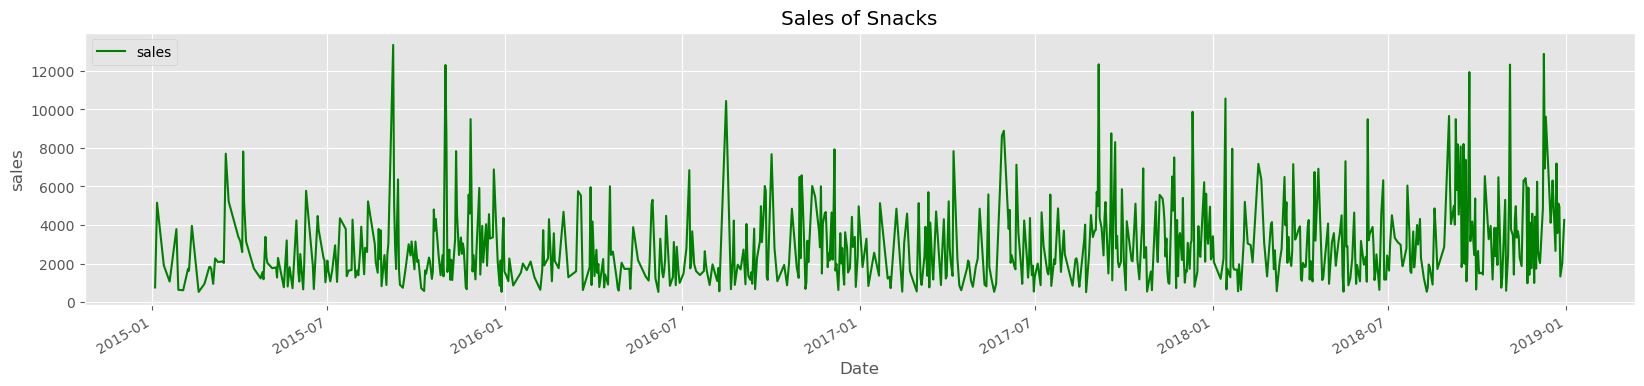

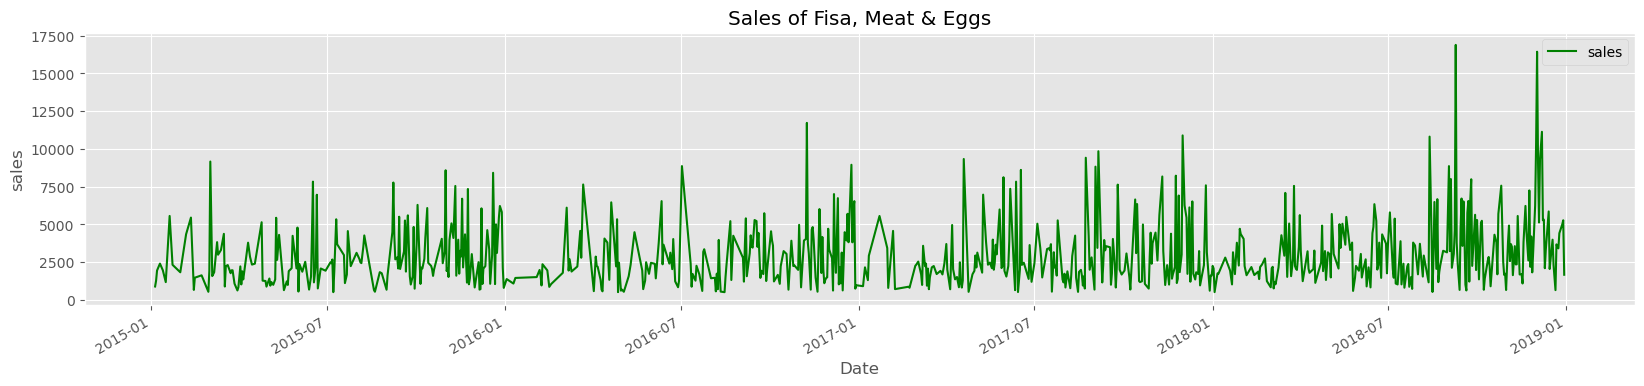

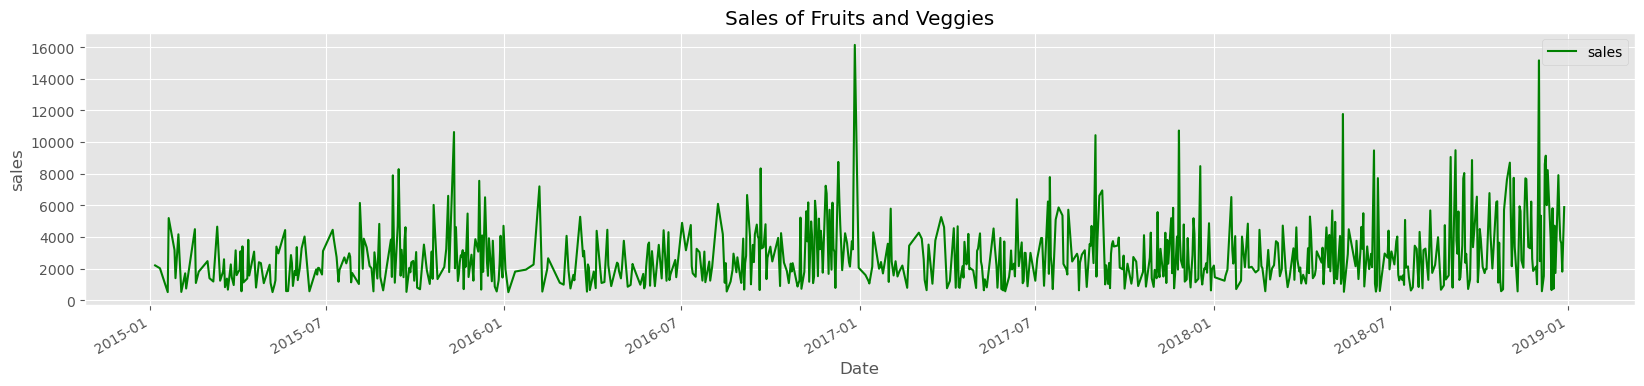

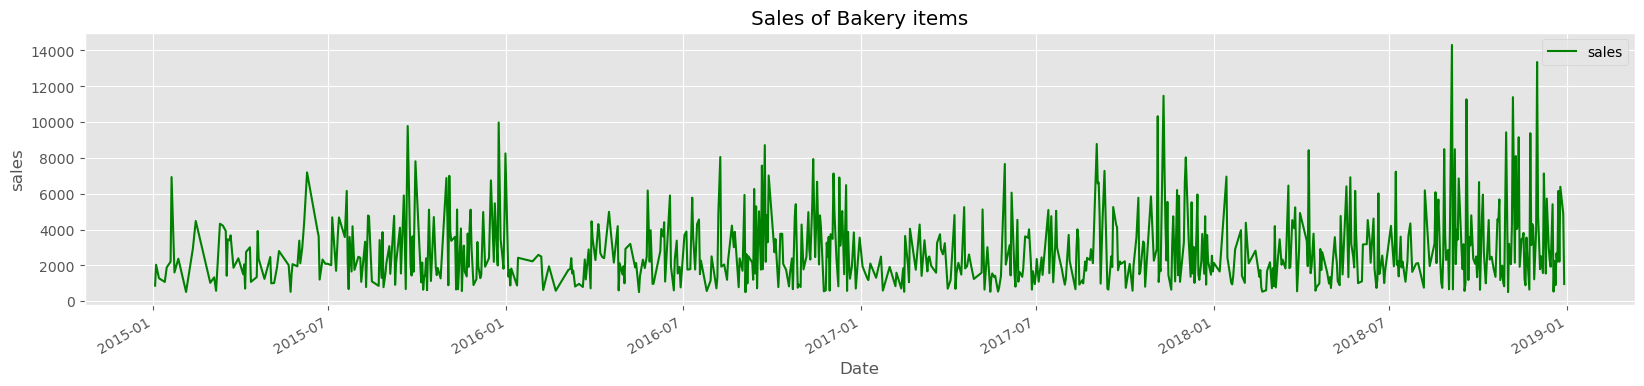

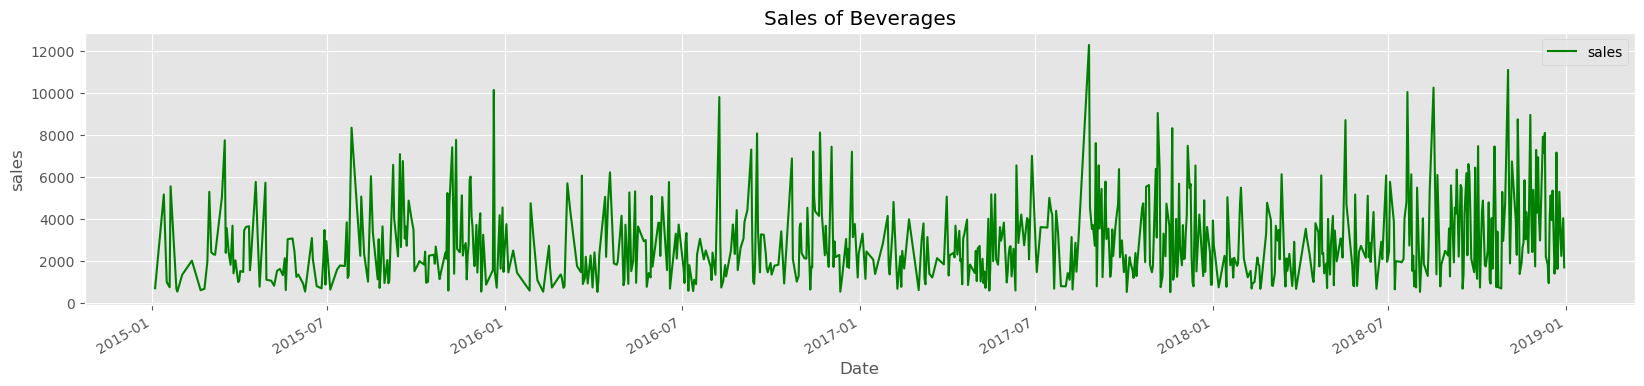

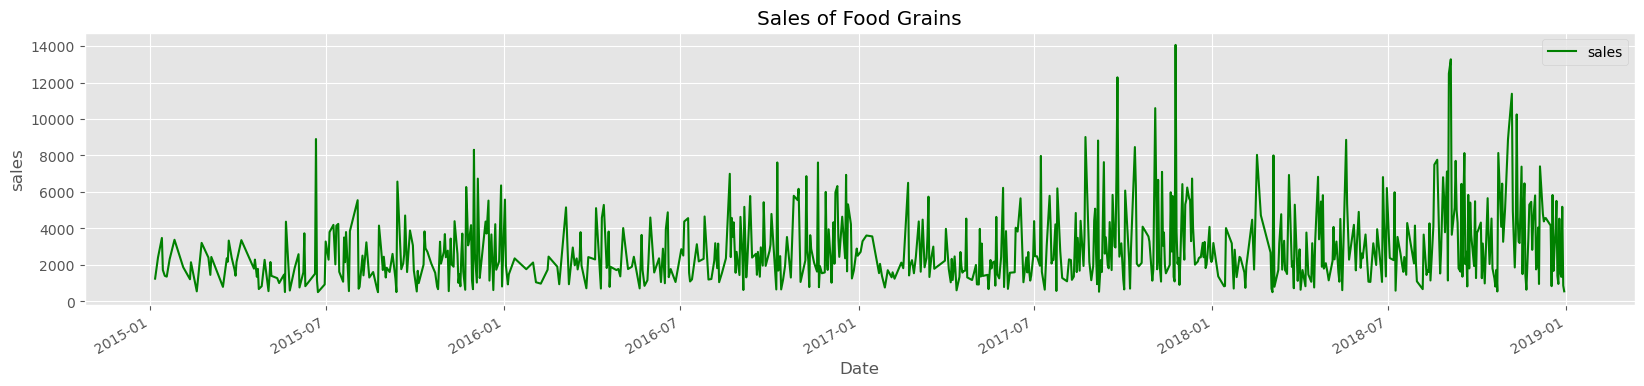

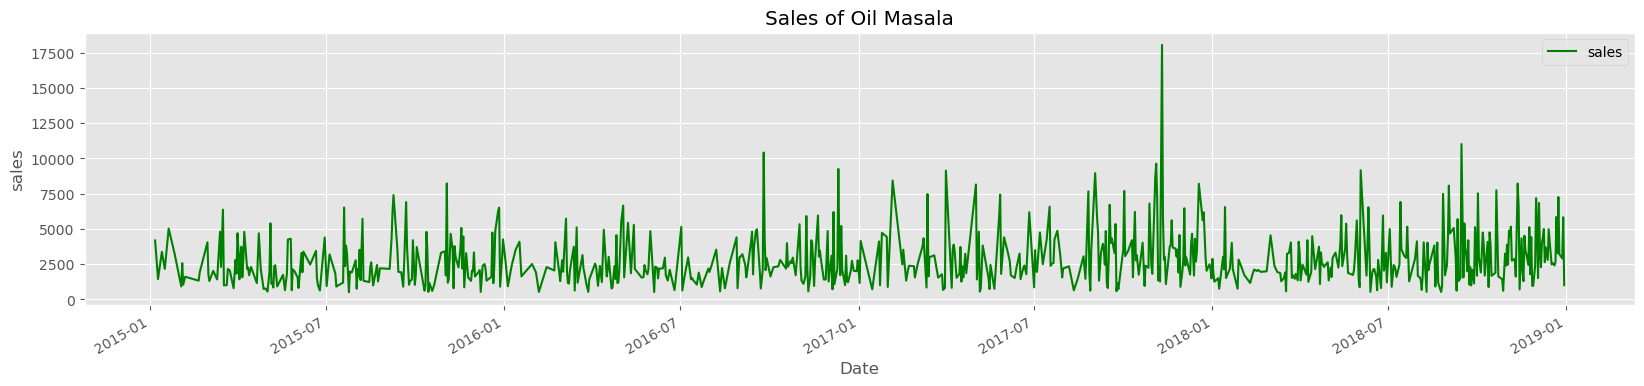

In [18]:
snacks_sales = snacks[['sales']]
snacks_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Snacks")
plt.show()

Eggs_Meat_Fish_sales = Eggs_Meat_Fish[['sales']]
Eggs_Meat_Fish_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Fisa, Meat & Eggs")
plt.show()

Fruits_Veggies_sales = Fruits_Veggies[['sales']]
Fruits_Veggies_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Fruits and Veggies")
plt.show()

Bakery_sales = Bakery[['sales']]
Bakery_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Bakery items")
plt.show()

Beverages_sales = Beverages[['sales']]
Beverages_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Beverages")
plt.show()

Food_Grains_sales = Food_Grains[['sales']]
Food_Grains_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Food Grains")
plt.show()
Oil_Masala_sales = Oil_Masala[['sales']]
Oil_Masala_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Oil Masala")
plt.show()

In [19]:
# Using averages daily sales value - set start of the month as index
avg_snacks_sales = snacks_sales['sales'].resample('MS').mean()
avg_Eggs_Meat_Fish_sales = Eggs_Meat_Fish_sales['sales'].resample('MS').mean()
avg_Fruits_Veggies_sales = Fruits_Veggies_sales['sales'].resample('MS').mean()
avg_Bakery_sales =Bakery_sales['sales'].resample('MS').mean()
avg_Beverages_sales = Beverages_sales['sales'].resample('MS').mean()
avg_Food_Grains_sales = Food_Grains_sales['sales'].resample('MS').mean()
avg_Oil_Masala_sales = Oil_Masala_sales['sales'].resample('MS').mean()

In [20]:
avg_snacks_sales.shape

(48,)

In [21]:
fig = px.line(avg_snacks_sales, x=avg_snacks_sales.index, y=avg_snacks_sales, height=400)
fig.update_layout( title={
        'text': "Total snacks sale over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()

fig = px.line(avg_Eggs_Meat_Fish_sales, x=avg_Eggs_Meat_Fish_sales.index, y=avg_Eggs_Meat_Fish_sales, height=400)
fig.update_layout( title={
        'text': "Total Eggs,Meatand Fish sale over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()

fig = px.line(avg_Fruits_Veggies_sales, x=avg_Fruits_Veggies_sales.index, y=avg_Fruits_Veggies_sales, height=400)
fig.update_layout( title={
        'text': "Total fruits and veg sale over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()

fig = px.line(avg_Bakery_sales, x=avg_Bakery_sales.index, y=avg_Bakery_sales, height=400)
fig.update_layout( title={
        'text': "Total Bakery item sale over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()

fig = px.line(avg_Beverages_sales, x=avg_Beverages_sales.index, y=avg_Beverages_sales, height=400)
fig.update_layout( title={
        'text': "Total bevarages sale over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()

fig = px.line(avg_Food_Grains_sales, x=avg_Food_Grains_sales.index, y=avg_Food_Grains_sales, height=400)
fig.update_layout( title={
        'text': "Total sale food grains over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()


fig = px.line(avg_Oil_Masala_sales , x=avg_Oil_Masala_sales.index, y=avg_Oil_Masala_sales , height=400)
fig.update_layout( title={
        'text': "Total sale oil masala  over years",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="'Order Date",
    yaxis_title="Sales")
fig.show()





In [22]:
#Resampling the data on monthly frequency
df = snacks['sales'].resample('MS').mean()
df1 = Bakery['sales'].resample('MS').mean()
df2 = Eggs_Meat_Fish['sales'].resample('MS').mean()
df3 = Fruits_Veggies['sales'].resample('MS').mean()
df4 = Beverages['sales'].resample('MS').mean()
df5 = Food_Grains['sales'].resample('MS').mean()
df6 = Oil_Masala ['sales'].resample('MS').mean()

df.shape

(48,)

In [23]:
print(df)

order_date
2015-01-01    2217.166667
2015-02-01    1564.833333
2015-03-01    2857.923077
2015-04-01    2943.250000
2015-05-01    1865.700000
2015-06-01    2372.714286
2015-07-01    2210.142857
2015-08-01    2462.388889
2015-09-01    3334.937500
2015-10-01    2645.210526
2015-11-01    3383.260870
2015-12-01    2946.105263
2016-01-01    1571.333333
2016-02-01    2303.000000
2016-03-01    3230.200000
2016-04-01    1923.294118
2016-05-01    2198.111111
2016-06-01    2059.625000
2016-07-01    2313.214286
2016-08-01    2395.166667
2016-09-01    2740.526316
2016-10-01    3074.200000
2016-11-01    3522.500000
2016-12-01    2792.583333
2017-01-01    2317.428571
2017-02-01    2380.714286
2017-03-01    2504.315789
2017-04-01    2314.071429
2017-05-01    3277.500000
2017-06-01    2636.052632
2017-07-01    2495.266667
2017-08-01    2303.769231
2017-09-01    4403.142857
2017-10-01    2462.117647
2017-11-01    3556.045455
2017-12-01    3344.583333
2018-01-01    2726.562500
2018-02-01    3828.666667
2

# Testing For Stationary

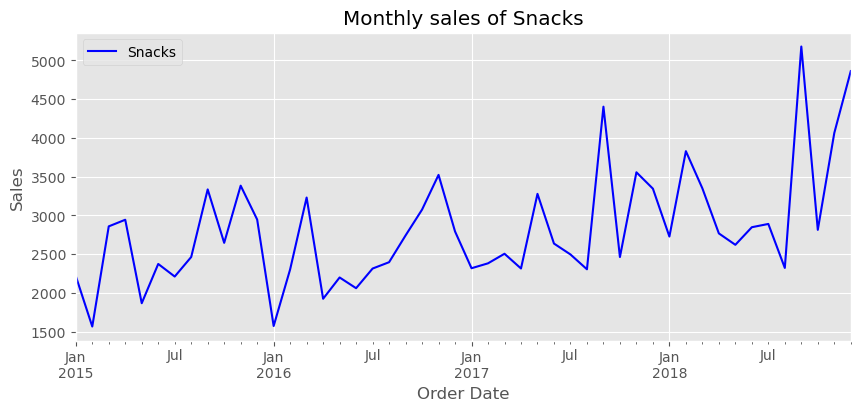

In [24]:
df.plot(figsize=(10, 4),color='blue',label = 'Snacks')

#avg_technology_sales.plot(figsize=(10, 4),color='red',label = 'Technology')

#avg_office_sales.plot(figsize=(10, 4),color='green',label = 'Office Supplies')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Monthly sales of Snacks")
plt.legend()
plt.show()

In [25]:
def test_stationarity(timeseries):
    rcParams['figure.figsize'] = 10, 6
    rolmean = timeseries.rolling(12).mean() #allows you to calculate moving avg
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Date")
    plt.ylabel('Average sales')
    plt.show(block=False)

    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print('p-value=', dftest[1])

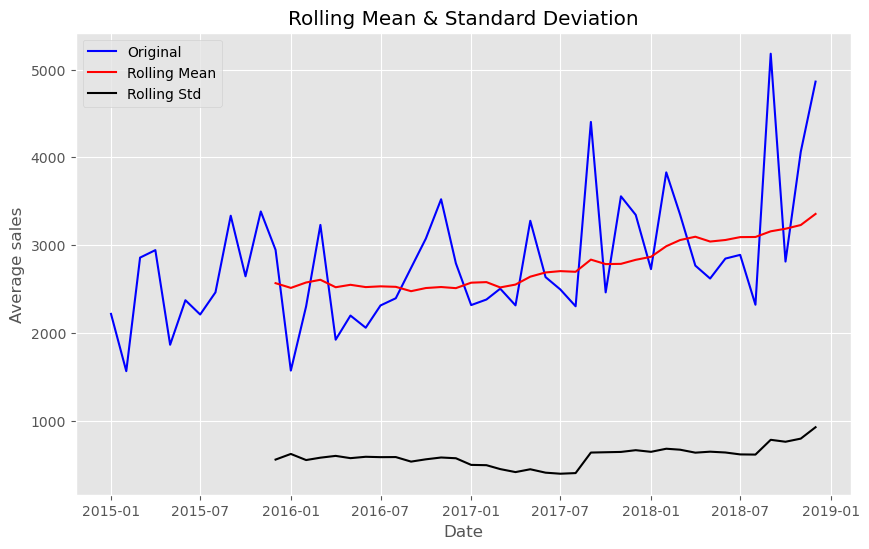

Results of Dickey-Fuller Test:
p-value= 0.5368323705427642


In [26]:
#check to see if the time-series is stationary or non-stationary
test_stationarity(df)

In [27]:
result = adfuller(df)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

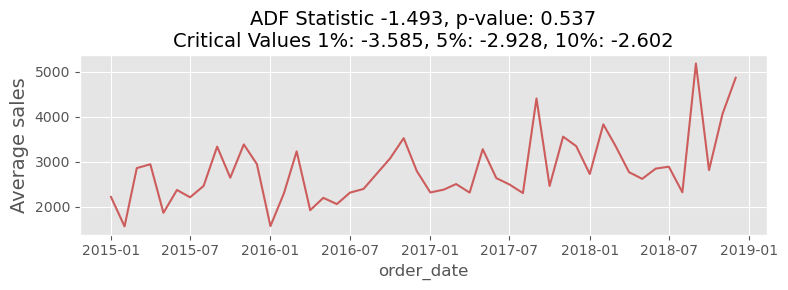

In [28]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.values, 'Average sales', ax)
#f.delaxes(ax[2,2])
plt.tight_layout()
plt.show()

# Tranforming

logging

In [29]:
df_log = np.log(abs(df))
df_log

order_date
2015-01-01    7.703985
2015-02-01    7.355535
2015-03-01    7.957850
2015-04-01    7.987270
2015-05-01    7.531392
2015-06-01    7.771790
2015-07-01    7.700812
2015-08-01    7.808887
2015-09-01    8.112209
2015-10-01    7.880506
2015-11-01    8.126595
2015-12-01    7.988239
2016-01-01    7.359680
2016-02-01    7.741968
2016-03-01    8.080299
2016-04-01    7.561795
2016-05-01    7.695354
2016-06-01    7.630279
2016-07-01    7.746393
2016-08-01    7.781208
2016-09-01    7.915905
2016-10-01    8.030800
2016-11-01    8.166926
2016-12-01    7.934722
2017-01-01    7.748213
2017-02-01    7.775156
2017-03-01    7.825771
2017-04-01    7.746764
2017-05-01    8.094836
2017-06-01    7.877038
2017-07-01    7.822151
2017-08-01    7.742302
2017-09-01    8.390074
2017-10-01    7.808777
2017-11-01    8.176404
2017-12-01    8.115097
2018-01-01    7.910797
2018-02-01    8.250272
2018-03-01    8.116370
2018-04-01    7.925501
2018-05-01    7.870853
2018-06-01    7.953984
2018-07-01    7.968723


c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



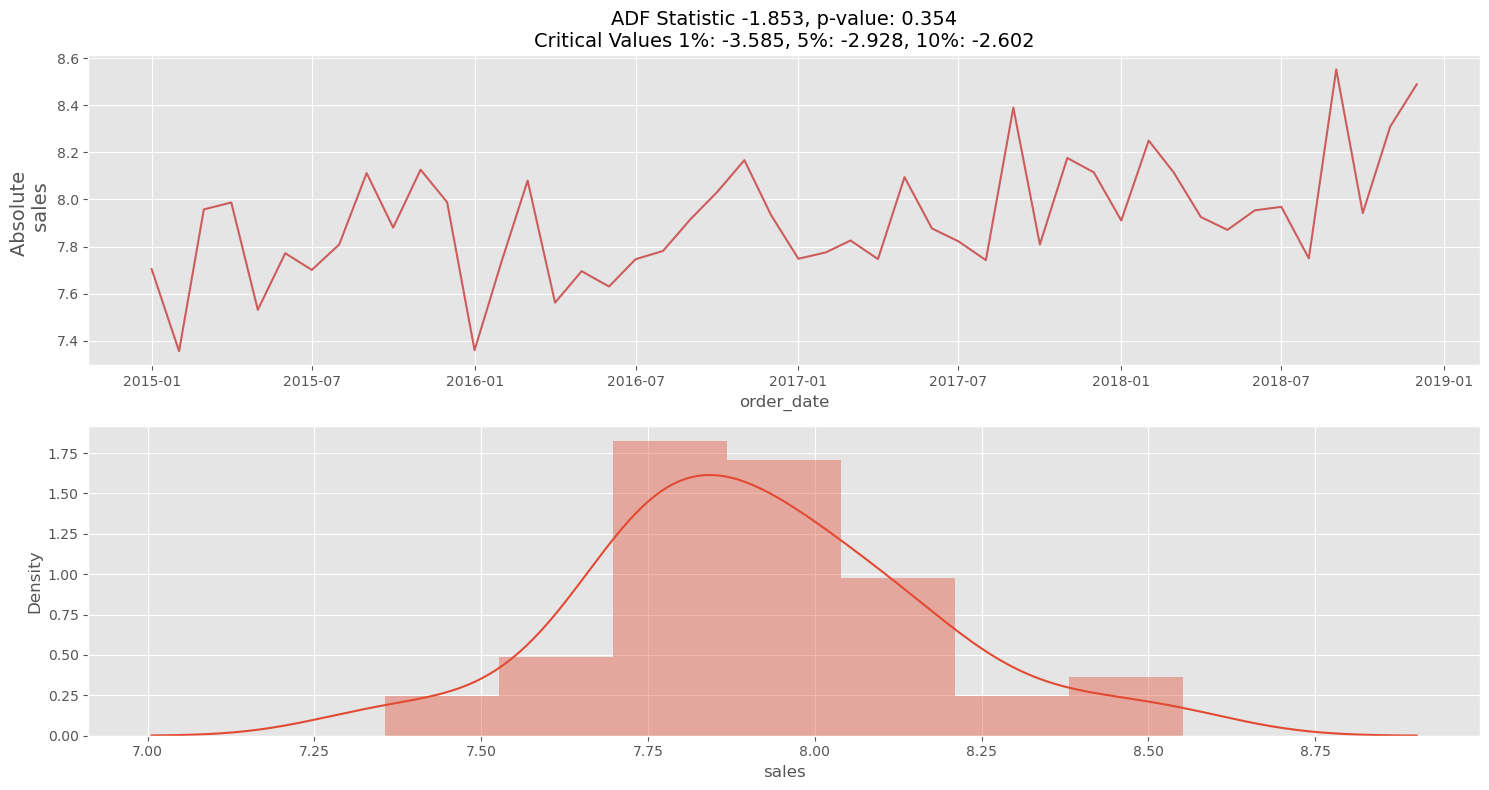

In [30]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
visualize_adfuller_results(df_log, 'Absolute \n sales', ax[ 0])
sns.distplot(df_log, ax=ax[1])


plt.tight_layout()
plt.show()

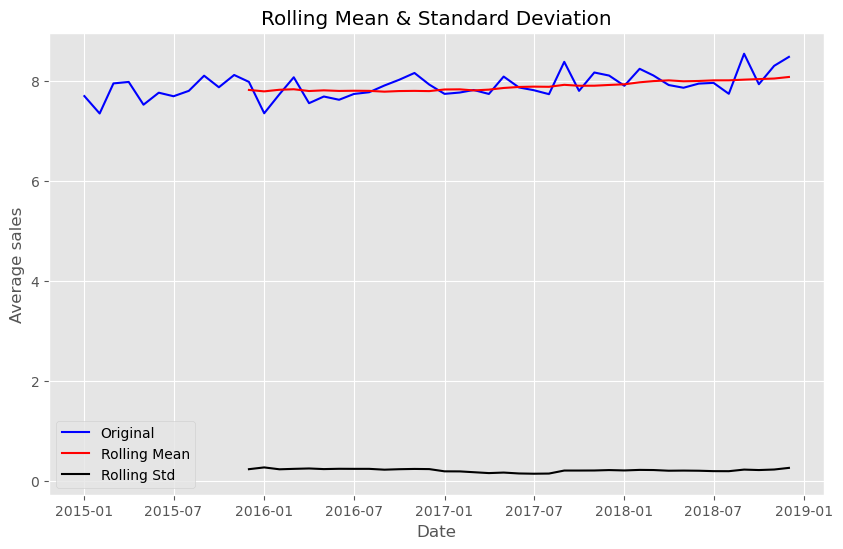

Results of Dickey-Fuller Test:
p-value= 0.3544935272971943


In [31]:
test_stationarity(df_log)

differensing

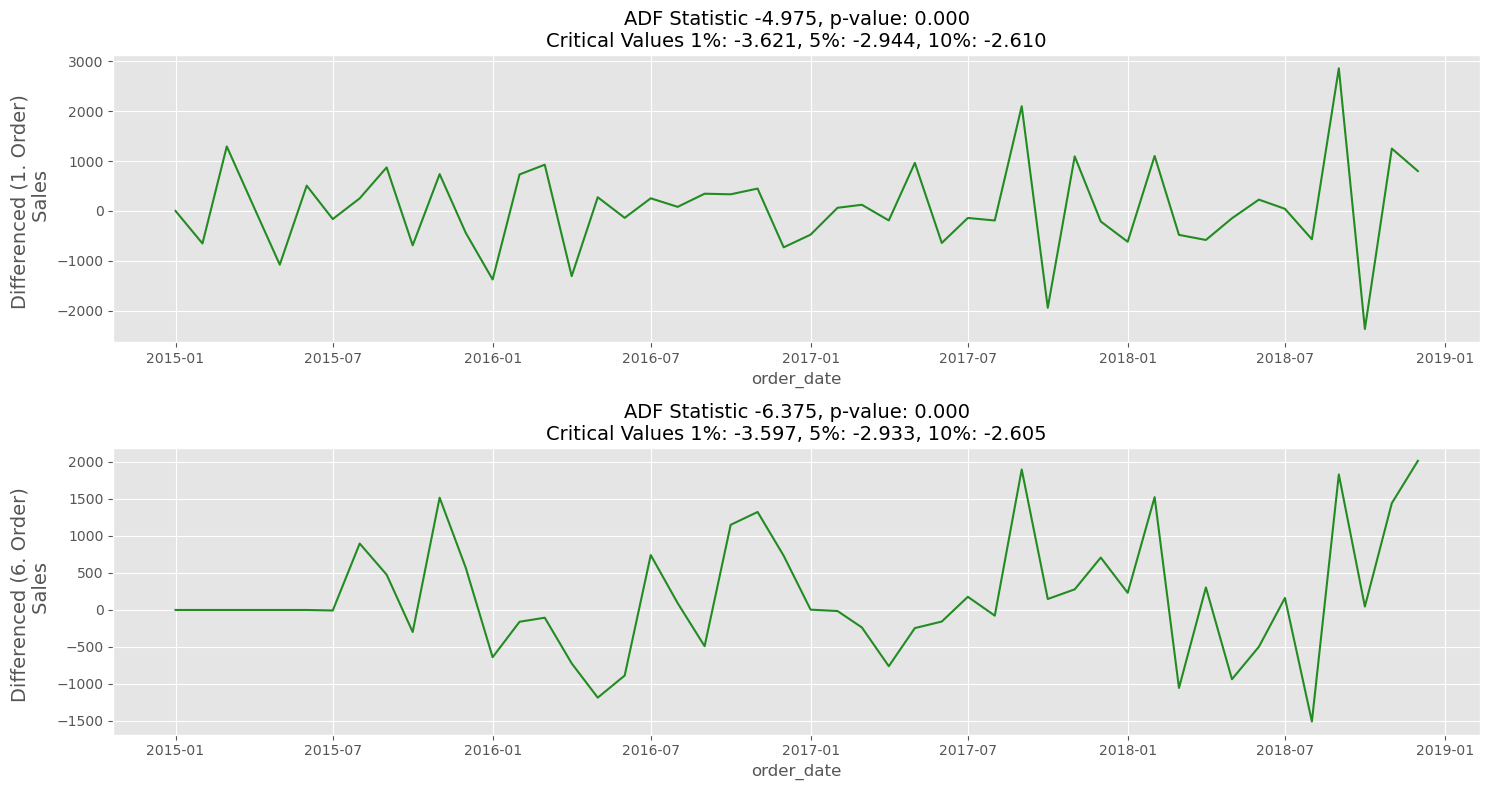

In [32]:
# First Order Differencing

diff = df.diff()
diff

diff2 = df.diff(6)

diff2

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

visualize_adfuller_results(diff.fillna(0), 'Differenced (1. Order) \n Sales', ax[0])
visualize_adfuller_results(diff2.fillna(0), 'Differenced (6. Order) \n Sales', ax[1])


plt.tight_layout()
plt.show()

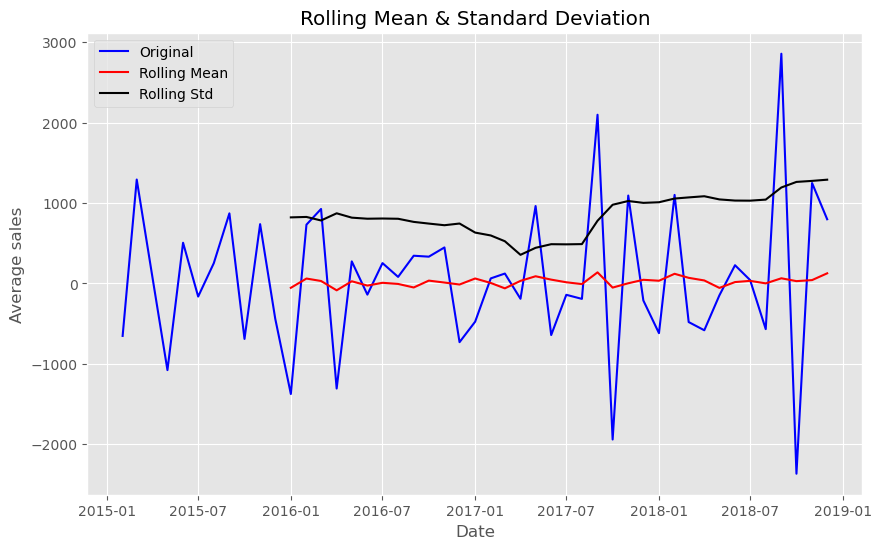

Results of Dickey-Fuller Test:
p-value= 2.4499914628572763e-05


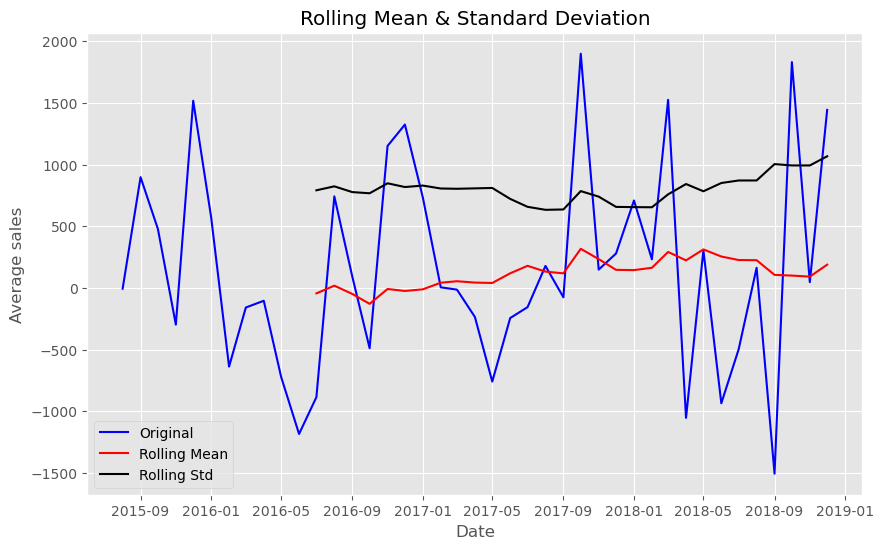

Results of Dickey-Fuller Test:
p-value= 9.153964543344114e-09


In [33]:
diff = diff.dropna()
test_stationarity(diff)
diff2 = diff2.shift().dropna()
test_stationarity(diff2)

# Seasonal Decomposition

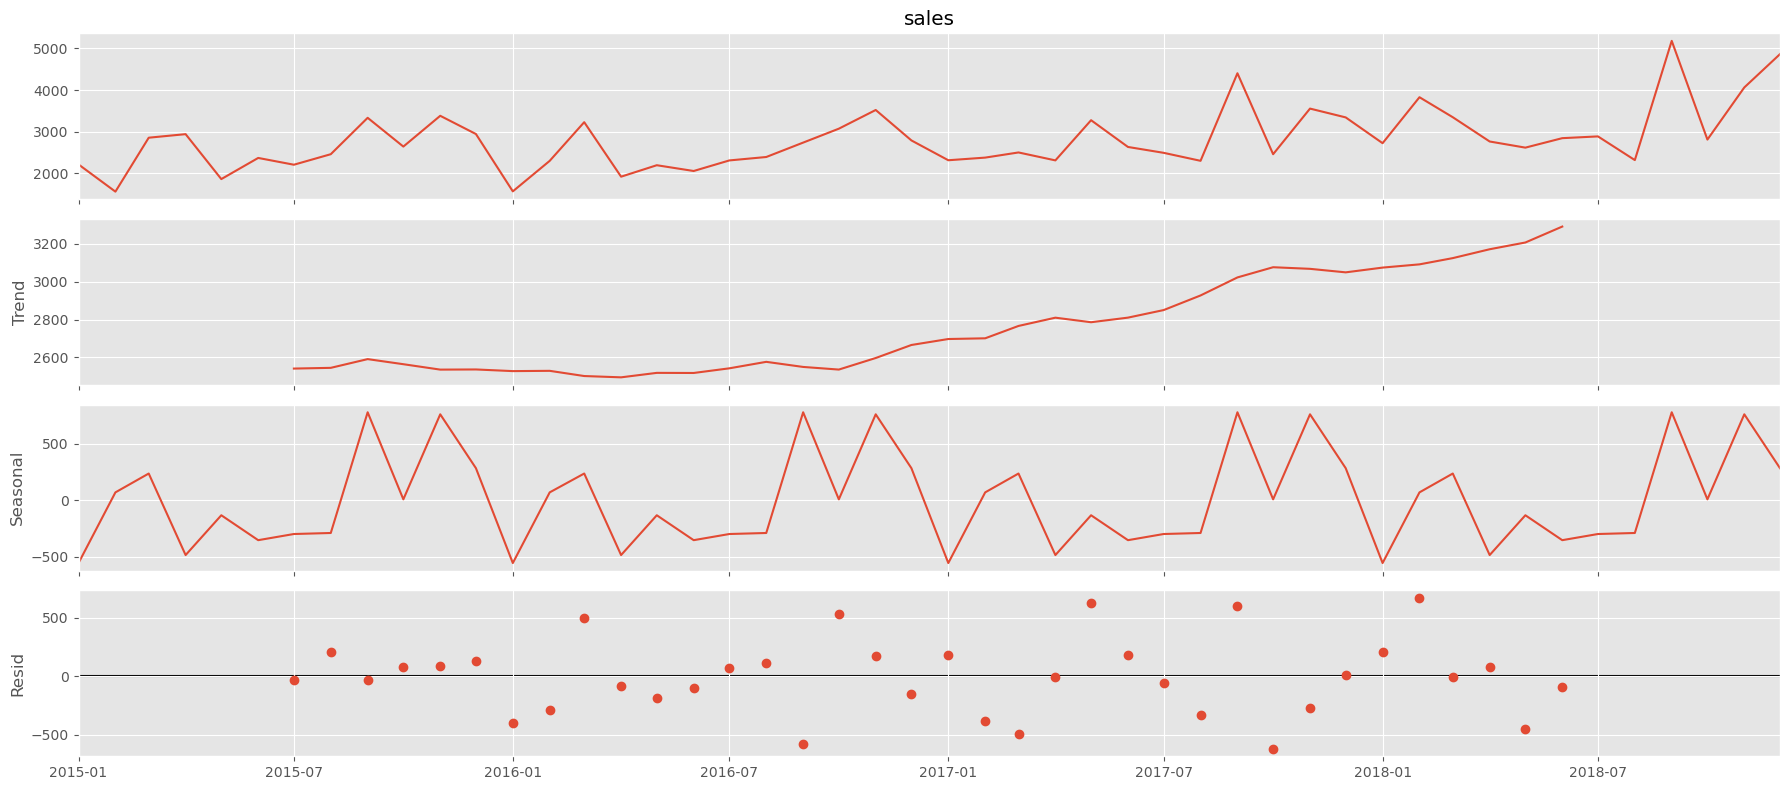

In [34]:
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()


# PACF and ACF

In [35]:
diff.shape

(47,)

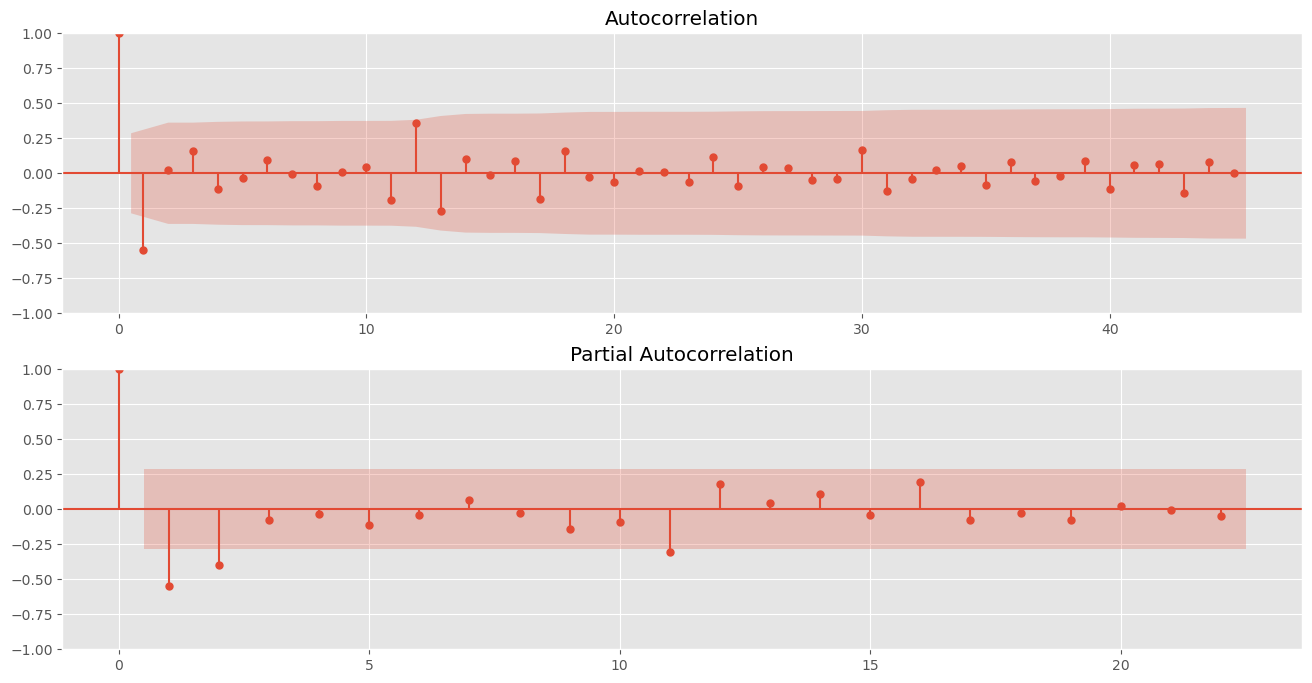

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(diff,lags =45 , ax=ax[0])
plot_pacf(diff,lags= 22 , ax=ax[1])
plt.show()

# Train Test Split

In [37]:
X = df
train_size = int(len(X) * 0.9)
trainset, testset= X[0:train_size], X[train_size:]

In [38]:
testset.shape

(5,)

In [39]:
def performance(y_true, y_pred):
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

def performance2(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

# ARIMA

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



{'MSE': 530178.38, 'RMSE': 728.13, 'MAPE': 13.89}


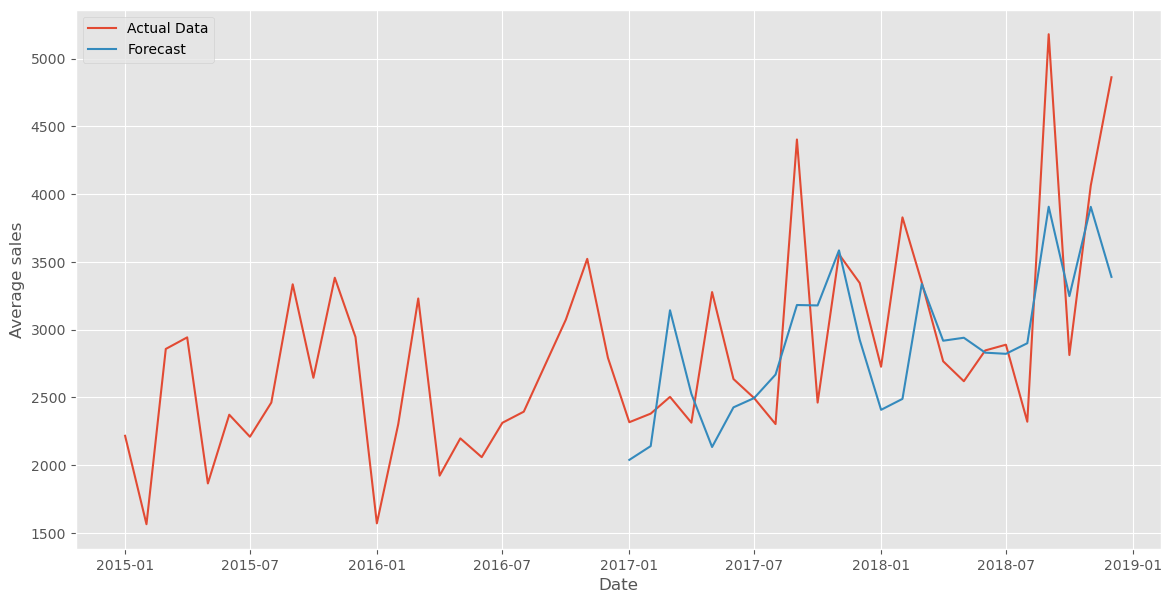

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



{'MSE': 530178.38, 'RMSE': 728.13, 'MAPE': 13.89}


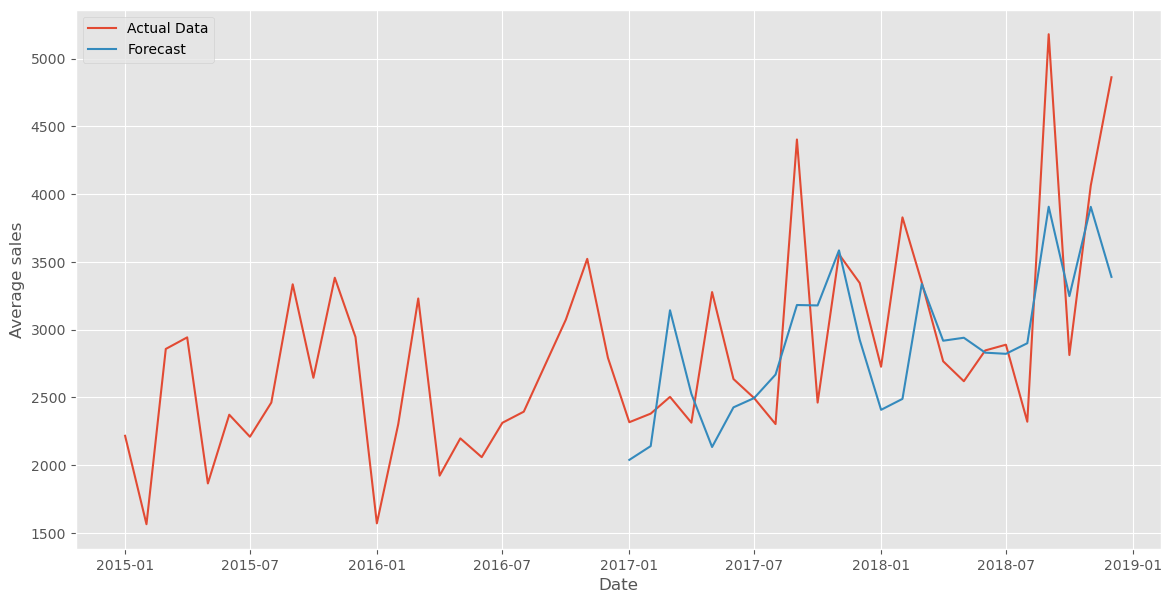

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



{'MSE': 542386.57, 'RMSE': 736.47, 'MAPE': 15.33}


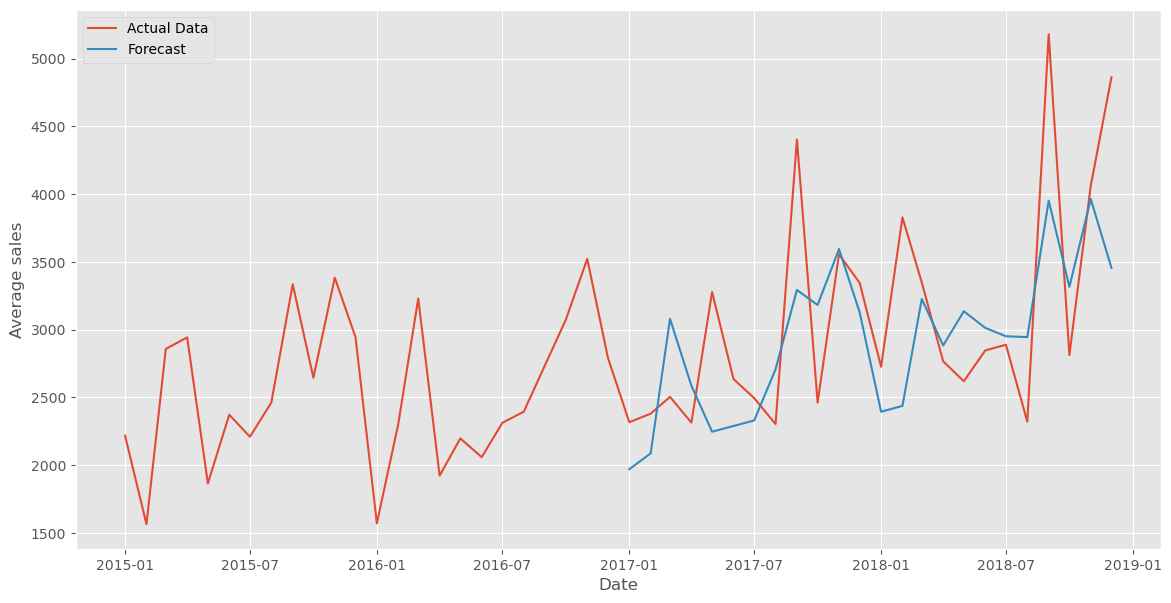

In [40]:
# Define the function for the ARIMA model
def arima_model(data, order, seasonal_order):
    model = ARIMA(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2018-12-01')
                                           ,dynamic=False)
    return yhat

# Define the function for the pipeline
def pipeline(data,dt2,order, seasonal_order, plot=True):
    yhat = arima_model(data, order, seasonal_order)
    arima_results= performance(dt2[-12:],yhat)
    print (arima_results)
    if plot:
        plt.figure(figsize=(14,7))
        plt.plot(dt2, label='Actual Data')
        plt.plot(yhat, label='Forecast')
        plt.xlabel("Date")
        plt.ylabel('Average sales')
        plt.legend(loc='upper left')
        plt.show()
    return yhat

# Define the data
#data = pd.read_csv('your_data.csv', index_col='date', parse_dates=True)

# Define the parameters for the ARIMA model
order = (0,1,1)
seasonal_order = (0,1,1,12)

# Run the pipeline
yhat = pipeline(trainset,df, order, seasonal_order, plot=True)
yhat =pipeline(trainset,df, (0,1,1), seasonal_order, plot=True)
yhat =pipeline(trainset,df, (2,1,1), seasonal_order, plot=True)


In [41]:
from pmdarima import auto_arima 
auto_arima(df, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -273.612
Date:                            Sun, 18 Feb 2024   AIC                            553.223
Time:                                    16:58:09   BIC                            557.890
Sample:                                01-01-2015   HQIC                           554.834
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8955      0.172     -5.217      0.000      -1.232      -0.559
ma.S.L12      -0.3379      0.240     -1.405      0.160      -0.809       0.133
sigma2      3.444e+05   8.16e+04      4.222      0.000    1.84e+05    5.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.40   Prob(JB):                         0.79
Heteroskedasticity (H):               1.99   Skew:                             0.27
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMA

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



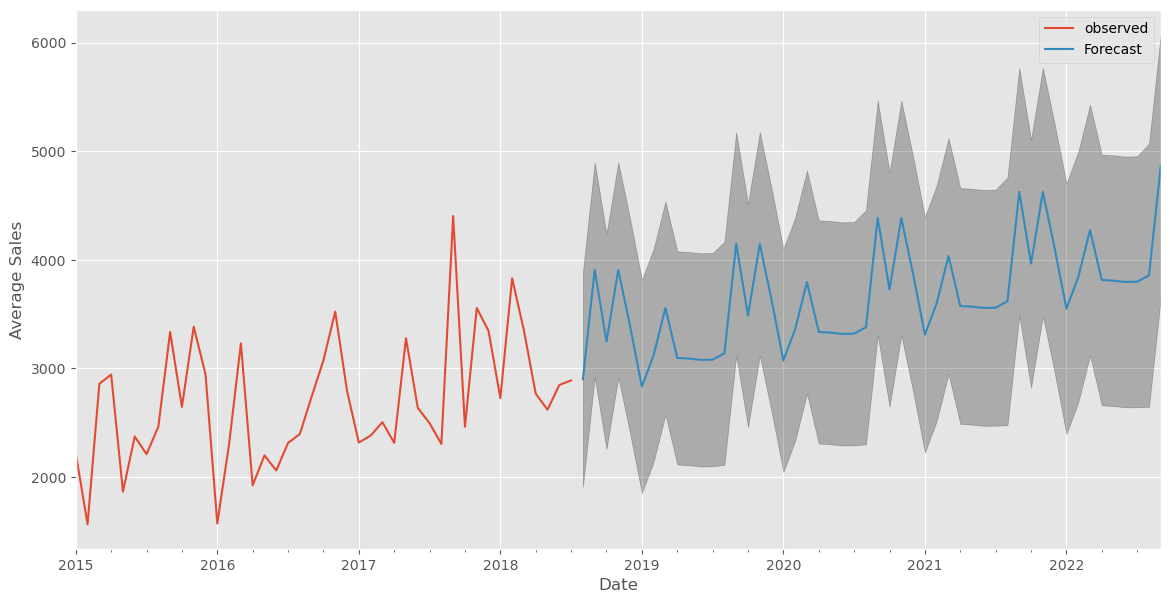

c:\ProgramData\Anaconda3\envs\imblearn\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



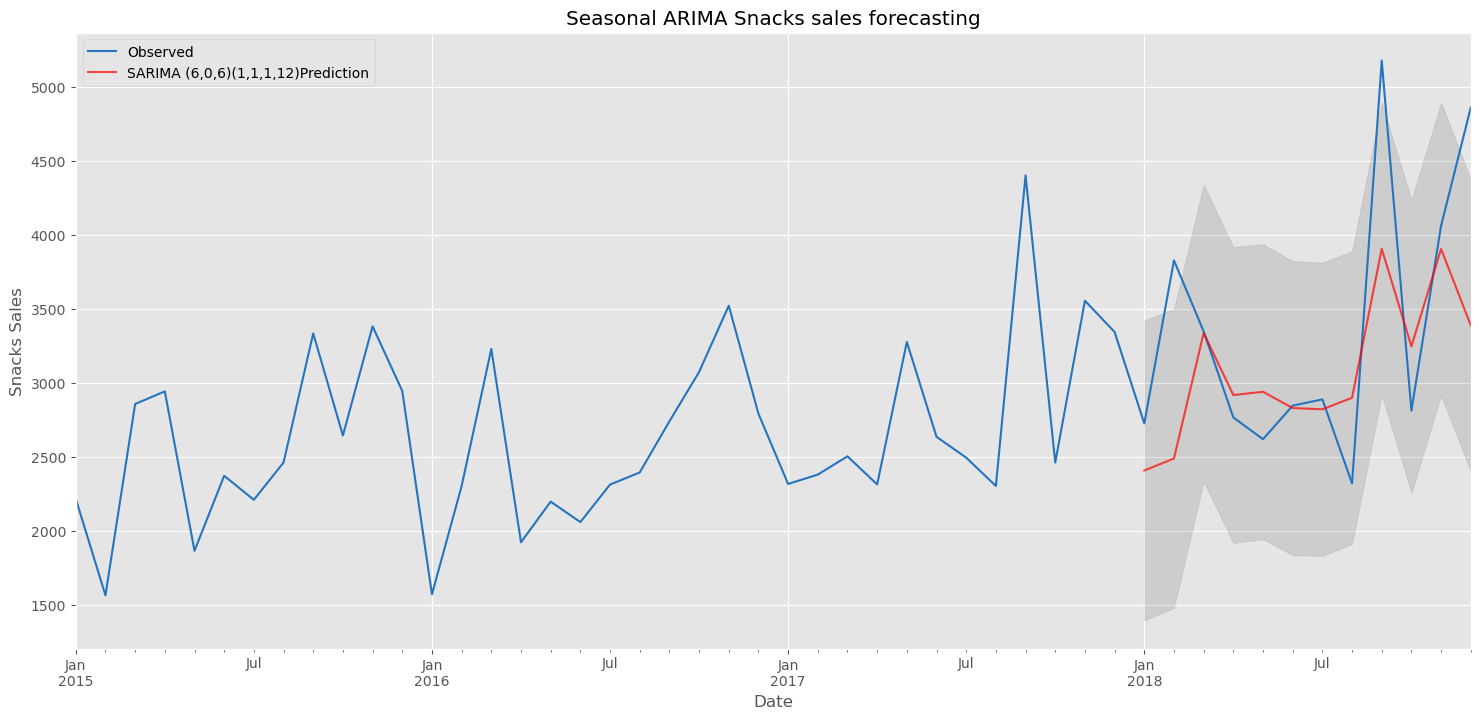

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the function for the ARIMA model
def sarima_model(data, order, seasonal_order, step):
    sarima_model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    sarima_fit = sarima_model.fit()
    further_predict = sarima_fit.get_forecast(steps=step)
    return further_predict

# Define the function for the pipeline
def pipeline(data, order, seasonal_order, step, plot=True):
    further_predict = sarima_model(data, order, seasonal_order, step)
    if plot:
        furthur_conf = further_predict.conf_int()
        ax = data.plot(label='observed', figsize=(14, 7))
        further_predict.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(furthur_conf.index,
                        furthur_conf.iloc[:, 0],
                        furthur_conf.iloc[:, 1], color='k', alpha=.25)
        ax.set_xlabel('Date')
        ax.set_ylabel('Average Sales')
        plt.legend()
        plt.show()
    return further_predict

# Define the data
h = pipeline(trainset, order, seasonal_order, 50, plot=True)

sarima_model1 = SARIMAX(trainset, order=order, seasonal_order=seasonal_order)
sarima_fit_1 = sarima_model1.fit()
sarima_predict_1 = sarima_fit_1.get_prediction(start=pd.to_datetime('2018-01-01'), end=pd.to_datetime('2018-12-01')
                                           ,dynamic=False)
sarima_predict_conf_1 = sarima_predict_1.conf_int()
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
sarima_predict_1.predicted_mean.plot(ax=ax, label='SARIMA (6,0,6)(1,1,1,12)Prediction', alpha= 0.7, color='red')
ax.fill_between(sarima_predict_conf_1.index,
                #lower sales
                sarima_predict_conf_1.iloc[:, 0],
                #upper sales
                sarima_predict_conf_1.iloc[:, 1], color='k', alpha=0.1)
plt.title('Seasonal ARIMA Snacks sales forecasting')
plt.xlabel('Date')
plt.ylabel('Snacks Sales')
plt.legend()
plt.show()

In [43]:
sarima_results=performance(df[-12:],sarima_predict_1.predicted_mean)
sarima_results

{'MSE': 530178.38, 'RMSE': 728.13, 'MAPE': 13.89}

# Prophet

In [44]:
#df_furniture = pd.DataFrame({'order_date':df.index, 'sales':df.values})
df_snack_train = pd.DataFrame({'order_date':trainset.index, 'sales':trainset.values})
df_snack_test = pd.DataFrame({'order_date':testset.index, 'sales':testset.values})

In [45]:
warnings.filterwarnings("ignore")
#from fbprophet import Prophet
from prophet import Prophet

df_snack_train = df_snack_train.rename(columns={'order_date': 'ds', 'sales': 'y'})
df_snack_test = df_snack_test.rename(columns={'order_date': 'ds', 'sales': 'y'})

In [46]:
# set the uncertainty interval to 95% (Prophet default is 80%)
snack_model = Prophet(interval_width=0.95)
snack_model.fit(df_snack_train)

16:58:11 - cmdstanpy - INFO - Chain [1] start processing
16:58:11 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
snack_forecast = snack_model.make_future_dataframe(periods=12, freq='MS')
snack_forecast =snack_model.predict(snack_forecast)

<Figure size 1800x600 with 0 Axes>

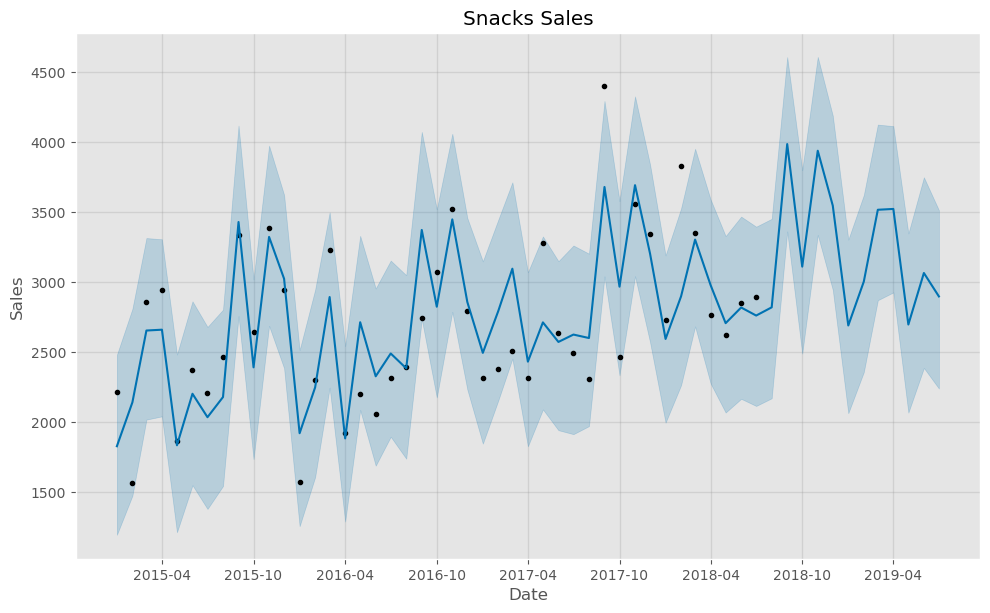

In [48]:
plt.figure(figsize=(18, 6))
snack_model.plot(snack_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Snacks Sales')
plt.show()

In [49]:
snack_forecast.drop(columns=['multiplicative_terms', 'multiplicative_terms_lower','multiplicative_terms_upper'])

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2015-01-01  2346.201462  1193.990193  2479.423981  2346.201462   
1  2015-02-01  2364.491797  1473.939868  2808.196977  2364.491797   
2  2015-03-01  2381.012099  2016.917411  3313.633067  2381.012099   
3  2015-04-01  2399.302434  2040.150959  3304.950618  2399.302434   
4  2015-05-01  2417.002758  1212.256106  2481.364672  2417.002758   
5  2015-06-01  2435.293093  1548.480018  2861.742863  2435.293093   
6  2015-07-01  2452.993417  1378.772527  2678.766283  2452.993417   
7  2015-08-01  2471.283751  1542.585861  2802.186562  2471.283751   
8  2015-09-01  2489.574086  2756.822404  4116.919545  2489.574086   
9  2015-10-01  2507.274410  1734.453974  3017.718906  2507.274410   
10 2015-11-01  2525.564745  2687.018370  3973.643864  2525.564745   
11 2015-12-01  2543.265069  2384.090772  3622.065450  2543.265069   
12 2016-01-01  2561.555404  1255.568480  2513.127819  2561.555404   
13 2016-02-01  2579.845739  1606.283467  2944.507725  2579.845739   
14 2016-03-01  2596.956052  2245.301079  3497.328240  2596.956052   
15 2016-04-01  2615.246387  1288.530702  2542.313236  2615.246387   
16 2016-05-01  2632.946711  2085.777940  3329.545309  2632.946711   
17 2016-06-01  2651.241110  1687.995866  2953.446177  2651.241110   
18 2016-07-01  2668.945367  1894.529032  3152.729000  2668.945367   
19 2016-08-01  2687.239767  1737.815829  3048.317784  2687.239767   
20 2016-09-01  2705.534167  2733.920208  4071.944253  2705.534167   
21 2016-10-01  2723.248523  2175.120324  3518.209642  2723.248523   
22 2016-11-01  2741.554332  2786.715578  4058.511769  2741.554332   
23 2016-12-01  2759.269644  2232.349117  3456.941764  2759.269644   
24 2017-01-01  2777.575466  1845.287370  3147.341716  2777.575466   
25 2017-02-01  2795.881288  2155.409289  3445.926439  2795.881288   
26 2017-03-01  2812.415622  2452.532598  3711.671557  2812.415622   
27 2017-04-01  2830.721492  1826.079198  3069.350442  2830.721492   
28 2017-05-01  2848.436850  2089.664233  3325.069603  2848.436850   
29 2017-06-01  2866.742719  1941.311240  3148.334091  2866.742719   
30 2017-07-01  2884.458077  1913.057607  3260.387845  2884.458077   
31 2017-08-01  2902.763947  1970.389050  3202.156138  2902.763947   
32 2017-09-01  2921.069817  3040.087334  4292.784279  2921.069817   
33 2017-10-01  2938.785175  2333.474799  3577.329715  2938.785175   
34 2017-11-01  2957.091045  3041.553065  4325.535392  2957.091045   
35 2017-12-01  2974.806403  2570.538602  3839.306228  2974.806403   
36 2018-01-01  2993.112272  1995.368367  3189.529064  2993.112272   
37 2018-02-01  3011.418142  2263.136009  3525.329065  3011.418142   
38 2018-03-01  3027.952476  2682.680708  3951.411533  3027.952476   
39 2018-04-01  3046.258346  2274.849417  3588.818537  3046.258346   
40 2018-05-01  3063.973704  2067.518672  3327.639269  3063.973704   
41 2018-06-01  3082.279574  2165.546325  3466.806120  3082.279574   
42 2018-07-01  3099.994932  2114.405828  3394.912725  3099.994932   
43 2018-08-01  3118.300802  2169.326736  3451.041861  3118.300072   
44 2018-09-01  3136.606672  3361.155892  4606.093007  3136.604405   
45 2018-10-01  3154.322030  2488.058552  3798.275783  3154.317953   
46 2018-11-01  3172.627900  3335.974223  4607.571576  3172.621535   
47 2018-12-01  3190.343258  2944.180694  4188.145491  3190.334061   
48 2019-01-01  3208.649127  2062.641305  3302.291614  3208.637025   
49 2019-02-01  3226.954997  2356.786141  3621.136957  3226.939980   
50 2019-03-01  3243.489331  2869.671661  4123.911404  3243.471534   
51 2019-04-01  3261.795201  2925.388139  4113.133626  3261.773777   
52 2019-05-01  3279.510559  2066.608984  3346.415310  3279.485601   
53 2019-06-01  3297.816429  2385.999321  3747.522175  3297.787190   
54 2019-07-01  3315.531787  2238.802079  3512.794223  3315.499124   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   2346.201462     -519.414785           -519.414785           -51

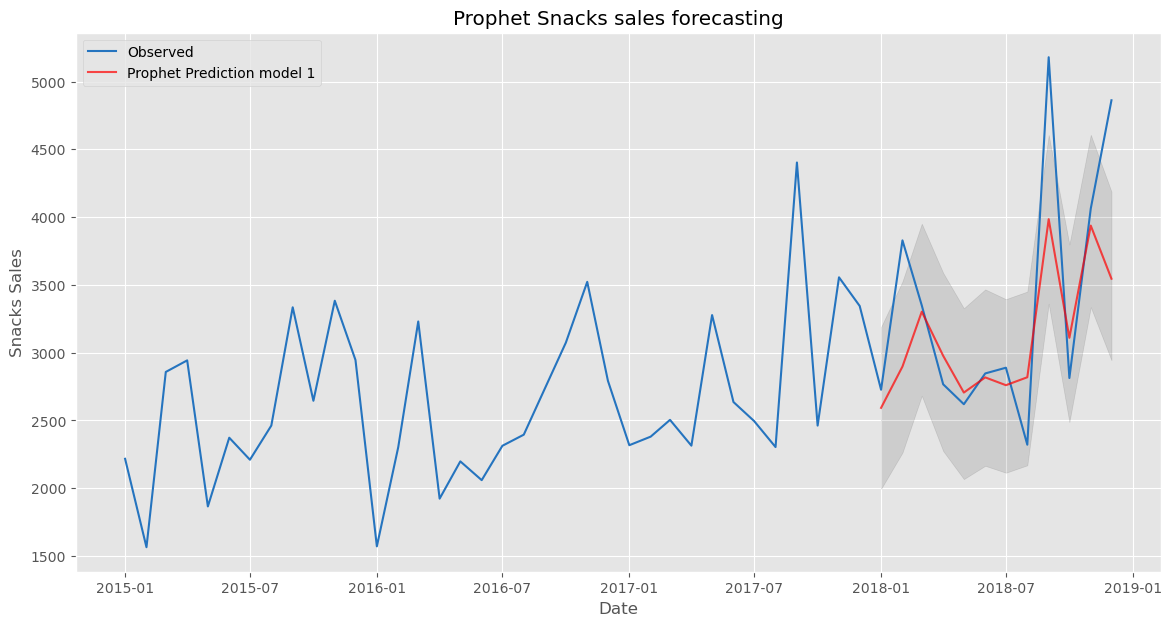

In [50]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,snack_forecast[36:48]['yhat'].values,label='Prophet Prediction model 1', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
               snack_forecast[36:48]['yhat_lower'].values,
                #upper sales
                snack_forecast[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet Snacks sales forecasting')
plt.xlabel('Date')
plt.ylabel('Snacks Sales')
plt.legend()
plt.show()

In [51]:
performance(df[36:48].values, snack_forecast[36:48]['yhat'])


{'MSE': 372341.27, 'RMSE': 610.2, 'MAPE': 11.02}

Prophet including Holidays

In [52]:
#Holidays with Prophet
christmas_holidays = pd.DataFrame({'holiday': "Christmass Day", 'ds' : pd.to_datetime(['2014-12-25', '2015-12-25','2016-12-25','2017-12-25','2018-12-25'])})
republic_day = pd.DataFrame({'holiday': "republic_day", 'ds' : pd.to_datetime(['2014-01-26', '2015-01-26','2016-01-26','2017-01-26','2018-01-26'])})
independence_day = pd.DataFrame({'holiday': "independence_da", 'ds' : pd.to_datetime(['2014-08-15','2015-08-15','2016-08-15', '2017-08-15','2018-08-15'])})
ghadhi =  pd.DataFrame({'holiday': "ghadhi", 'ds' : pd.to_datetime(['2014-10-02','2015-10-02','2016-10-02', '2017-10-02','2018-10-02'])})

india_public_holidays = pd.concat([christmas_holidays, republic_day, independence_day,ghadhi])

# more accurate without holidays!
snack_model2 = Prophet(yearly_seasonality=True, holidays=india_public_holidays)
#furniture_model2.fit(df_furniture)
snack_model2.fit(df_snack_train)

16:58:13 - cmdstanpy - INFO - Chain [1] start processing
16:58:13 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
snack_forecast2 = snack_model2.make_future_dataframe(periods=36, freq='MS')
snack_forecast2 =snack_model2.predict(snack_forecast2)

<Figure size 1800x600 with 0 Axes>

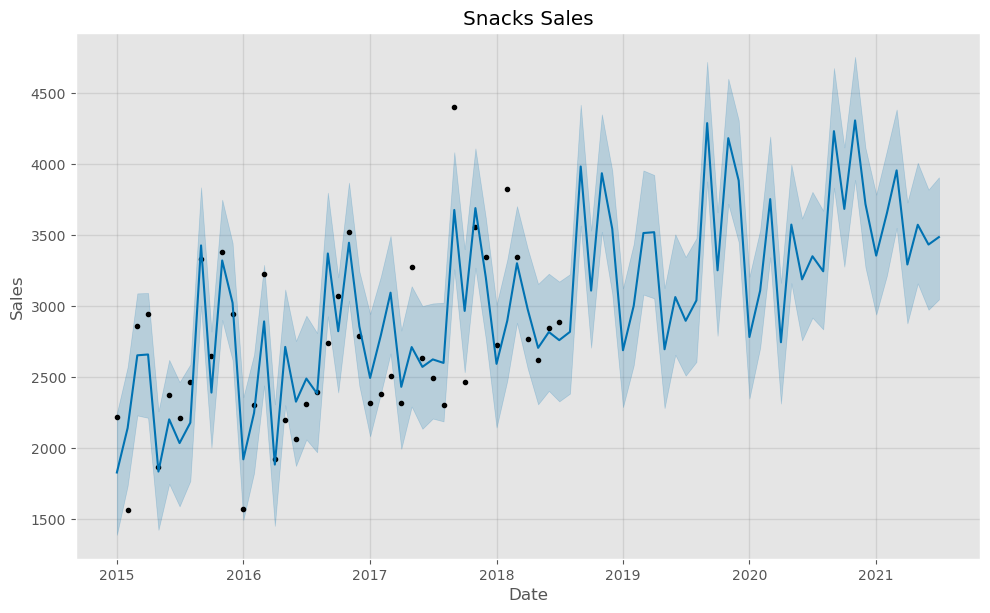

In [54]:
plt.figure(figsize=(18, 6))
snack_model2.plot(snack_forecast2, xlabel = 'Date', ylabel = 'Sales')
plt.title('Snacks Sales')
plt.show()

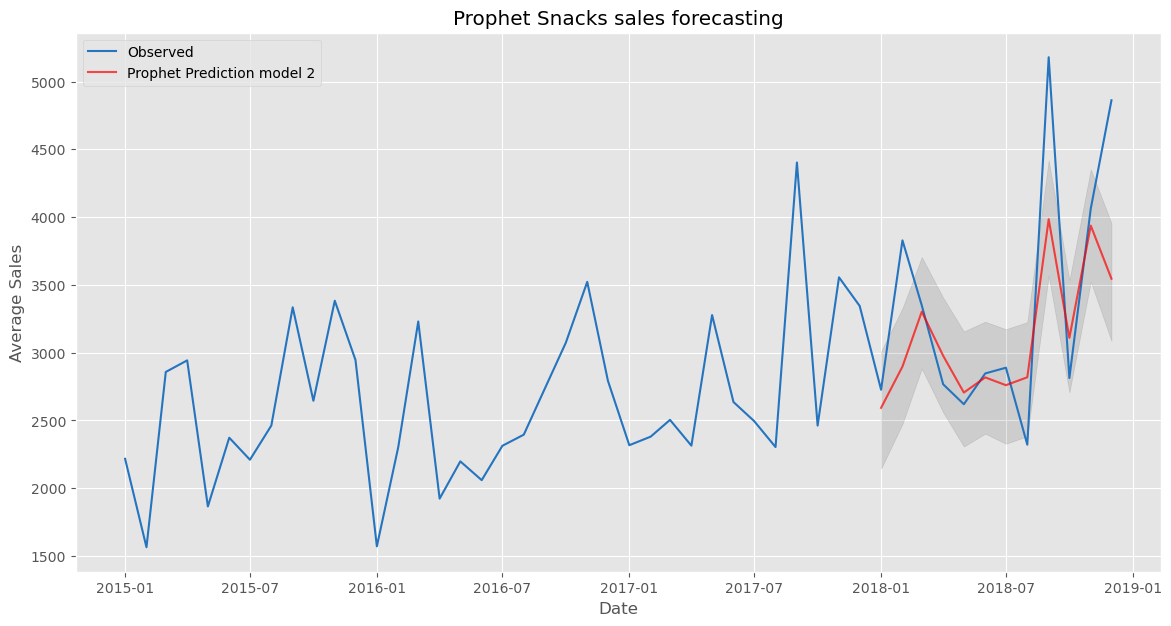

In [55]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,snack_forecast2[36:48]['yhat'].values,label='Prophet Prediction model 2', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
                snack_forecast2[36:48]['yhat_lower'].values,
                #upper sales
                snack_forecast2[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet Snacks sales forecasting')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()

In [56]:
performance(df[36:48].values,  snack_forecast2[36:48]['yhat'])

{'MSE': 372341.27, 'RMSE': 610.2, 'MAPE': 11.02}

# LSTM

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,Bidirectional
from tensorflow.keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from pandas import DataFrame
from pandas import concat
from pandas import Series
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = df

## using timeseries generator

In [58]:
#train, test = np.array(df[:-12]), np.array(df[-12:])

train_size = int(len(X) * 0.9)
train, test =np.array( X[0:train_size]), np.array(X[train_size:])


train= train.reshape(-1,1)
test= test.reshape(-1,1)

In [59]:
#Scale train and test data to [-1, 1]
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [60]:
n_input = 12
# univariate
n_features = 1
#TimeseriesGenerator automatically transform a univariate time series dataset into a supervised learning problem.
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=10)

In [61]:
######
n=3
store2= np.zeros((12,n))
for i in range(n):
    model_stacked = Sequential()
    #In stacked LSTM, we should output a sequence rather than a single value for each input -> return_sequences=True
    model_stacked.add(LSTM(50, activation='relu', return_sequences = True, input_shape=(12, 1)))
    model_stacked.add(LSTM(50, activation='relu'))
    model_stacked.add(Dense(100, activation='relu'))
    model_stacked.add(Dense(50, activation='relu'))
    model_stacked.add(Dense(1))
    model_stacked.compile(optimizer='adam', loss='mse')
    model_stacked.fit_generator(generator,epochs=200)
    
    pred_list_s = []

    batch = train[-n_input:].reshape((1, n_input, n_features))

    for j in range(n_input):   
        pred_list_s.append(model_stacked.predict(batch)[0]) 
        batch = np.append(batch[:,1:,:],[[pred_list_s[j]]],axis=1)

    df_predict_stacked = pd.DataFrame(scaler.inverse_transform(pred_list_s),
                              index=df[-n_input:].index, columns=['Prediction'])

    
    store2[:,i]=df_predict_stacked['Prediction']
print(store2)



Epoch 1/200

4/4 [==============================] - 4s 10ms/step - loss: 1.0479
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0467
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0347
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0320
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0326
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 1.0269
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0309
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0187
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0167
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0090
Epoch 11/200
4/4 [==============================] - 0s 10ms/step - loss: 1.0068
Epoch 12/200
4/4 [==============================] - 0s 7ms/step - loss: 0.9994
Epoch 13/200
4/4 [==============================] - 

In [62]:
final_stacked2= np.zeros((store2.shape[0],1))
for i in range(store2.shape[0]):
    
    final_stacked2[i]=np.mean(store2[i,:])
final_stacked2=final_stacked2.reshape((12,))


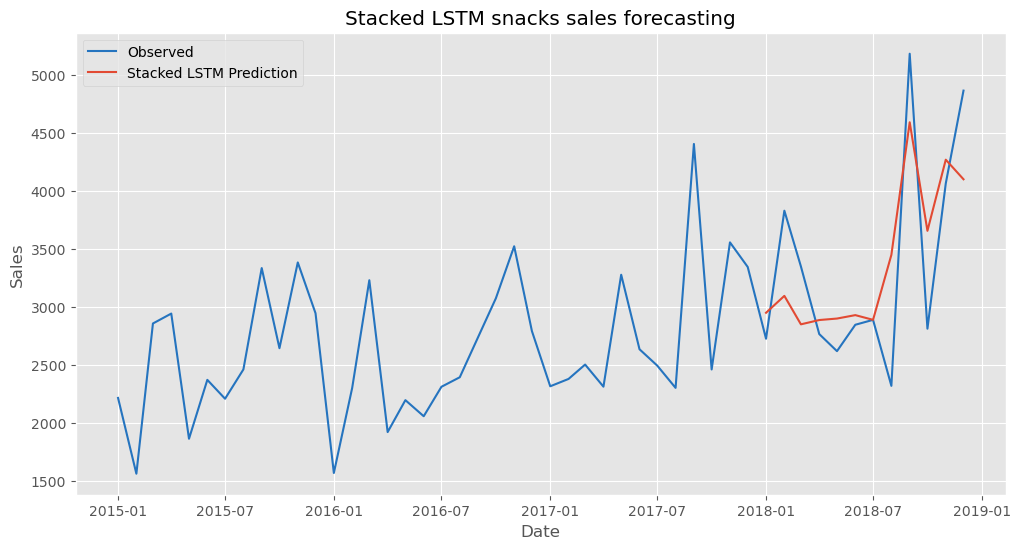

In [66]:
# report performance
rcParams['figure.figsize'] = 12, 6
# line plot of observed vs predicted
plt.plot(df.index,df,label="Observed",color='#2574BF')
plt.plot(df[36:].index,final_stacked2,label="Stacked LSTM Prediction")
plt.title('Stacked LSTM snacks sales forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [64]:
stacked_lstm= performance(df[-12:],final_stacked2)
stacked_lstm

{'MSE': 324030.65, 'RMSE': 569.24, 'MAPE': 14.24}